# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [90]:
import time

import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [6]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [4]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-02-23T13:01:29+0300',
 'created_at': '2023-02-23T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [5]:
data['found']

241

Количество страниц в результатах поиска

In [6]:
data['pages']

25

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [7]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_id,address.metro.lat,address.metro.lng,address,employer.logo_urls,salary,department.id,department.name,insider_interview.id,insider_interview.url
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-02-23T13:01:29+0300,2023-02-23T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74257661,False,Data scientist,NaN,False,False,None,None,2023-02-23T15:02:29+0300,2023-02-23T15:02:29+0300,...,133,55.7232,37.5038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76925483,False,Data Scientist,NaN,False,False,None,None,2023-02-25T14:31:00+0300,2023-02-25T14:31:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77208642,False,Data Scientist middle+/Senior,NaN,False,False,None,None,2023-02-23T12:06:39+0300,2023-02-23T12:06:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77223284,False,Аналитик данных (Data Scientist) / ML-разработчик,NaN,False,False,None,None,2023-02-23T15:00:20+0300,2023-02-23T15:00:20+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [8]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [9]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

В документации hh.ru написано, что в поле text можно передавать логические операции со словами и словасочетаниями

In [79]:
import time
data = []
url = 'https://api.hh.ru/vacancies'
# 100 17577 20

def getVacancies(page):
    params = {
        'text': '\"Data Scientist\" OR \"Data analyst\" OR \"Аналитик\" OR \"ML Researcher\" OR \"ML Engineer\"',
        'area': 1,
        'page': page,
        'per_page': 100
    }
    response = requests.get(url, params)
    return json.loads(response.content.decode())

res = getVacancies(0)
data += res['items']
for i in range(1, res['pages']):
    data += getVacancies(i)['items']
    time.sleep(1)

print(len(data))

2000


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

Для того, чтобы убрать дубликаты мы заведем множество, в которое будем пихать id вакансий, если, при обработке вакансии окажется, что ее id уже есть в множестве, то мы вакансию пропускаем.

In [56]:
seen = set()
new_data = []
for d in data:
    id = int(d['id'])
    if id not in seen:
        seen.add(id)
        new_data.append(d)

data = new_data
print(len(data))

1993


In [58]:
data_table = []
counter = 0

for i in data:
    response = requests.get(url + '/' + str(i['id']))
    data_table.append(json.loads(response.content.decode()))
    counter += 1
    if counter % 30 == 0:
        time.sleep(.5)

print(len(data_table))

1993


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [59]:
df = pd.json_normalize(data_table)
df.head()

,id,premium,relations,name,insider_interview,response_letter_required,salary,address,allow_messages,contacts,...,vacancy_constructor_template.name,vacancy_constructor_template.top_picture.height,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.top_picture.path,vacancy_constructor_template.top_picture.blurred_path,vacancy_constructor_template.bottom_picture.height,vacancy_constructor_template.bottom_picture.width,vacancy_constructor_template.bottom_picture.path,vacancy_constructor_template.bottom_picture.blurred_path,vacancy_constructor_template.bottom_picture
0,77605375,False,[],Data analyst,NaN,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77616544,False,[],Data-аналитик,NaN,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77586678,False,[],Data Analyst,NaN,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77613664,False,[],Data Scientist,NaN,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77024983,False,[],Аналитик данных / Data Analyst,NaN,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

Код ниже сохраняет таблицу в виде xlsx

In [60]:
writer = pd.ExcelWriter('task4_table.xlsx', engine='xlsxwriter')

df.to_excel(writer, sheet_name='Sheet1', startrow=1, header=False, index=False)

workbook = writer.book
worksheet = writer.sheets['Sheet1']

(max_row, max_col) = df.shape

column_settings = [{'header': column} for column in df.columns]

worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})

worksheet.set_column(0, max_col - 1, 12)

writer.close()

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [61]:
print(len(df))

1993


**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Заполняем множество названиями навыков из всех вакансий, т.к. мы используем set, то дубликатов не будет

In [81]:
skills = set()

for i in range(len(df)):
    vacancy = df.iloc[i]
    for skill in vacancy['key_skills']:
        skills.add(skill['name'])
skills = list(skills)

skills_dict = {}
for skill in skills:
    skills_dict[skill] = 0
    for i in range(len(df)):
        if {'name': skill} in df.iloc[i]['key_skills']:
            skills_dict[skill] += 1

sorted_keys = sorted(skills_dict, key=skills_dict.get)
sorted_keys.reverse()

print("Num of skills:", len(skills))
print("Top 15 is:\n", *sorted_keys[:15])

Num of skills: 1621
Top 15 is:
 SQL Аналитическое мышление Анализ данных Python BPMN Бизнес-анализ MS PowerPoint UML Системный анализ Работа с большим объемом информации Английский язык Разработка технических заданий MS Excel Аналитика Аналитические исследования


Создадим таблицу с полями id, name (название навыка), count(сколько раз встречается в вакансиях)
По этой таблице можно будет запросто построить график для топ-15 навыков, ибо таблица отсортирована по count

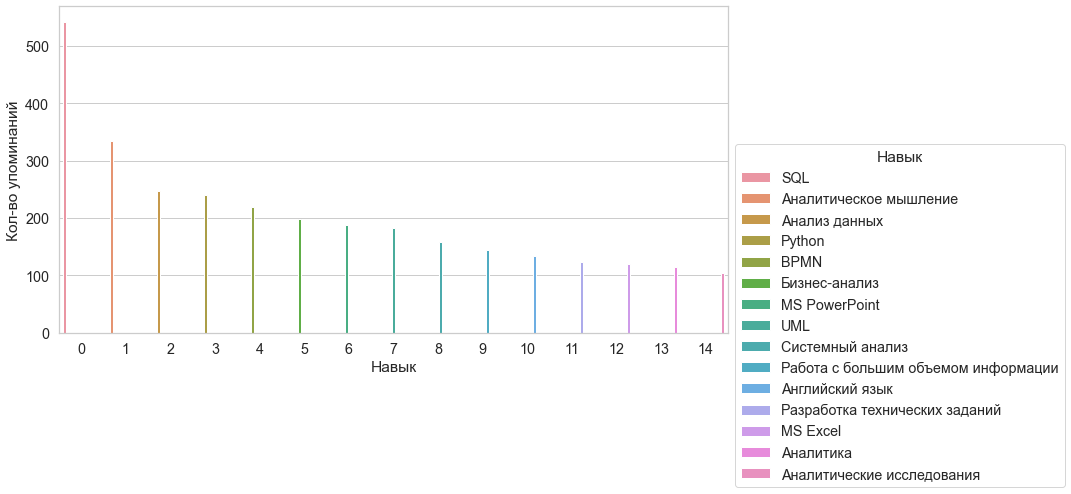

In [110]:
top_skills = list()
ind = 0
for key in sorted_keys[:15]:
    top_skills.append(
        {
            'id': ind,
            'name': key,
            'count': skills_dict[key]
        }
    )
    ind += 1
df_skills = pd.json_normalize(top_skills)
#print(df_skills.head())


with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_skills, x='id', y='count', hue='name', ci=None).set(ylabel='Кол-во упоминаний', xlabel='Навык')
    plt.legend(title='Навык', bbox_to_anchor=(1, 0.6))


**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Курс валют взят на дату 03.03.2023

In [259]:
usd_rub = 75.52
eur_rub = 80.09
max_salary = 0
min_salary = 0
tax = 0.13
df_tmp = df.dropna(axis='index', how='any', subset=['salary.gross'])
df_max_salary = df_tmp.groupby(by=['salary.currency']).max(['salary.from', 'salary.to'])
df_min_salary = df_tmp.groupby(by=['salary.currency']).min(['salary.from', 'salary.to'])

Определим минимальную и максимальную зарплаты, чтобы в дальнейшем покрывать ими пропуски.
Зарплату мы будем учитывать с вычетом налогов

In [260]:
# Находим самую максимальную зарплату
for i in range(len(df_max_salary)):
    has_tax = !df_max_salary.iloc[i]['salary.gross']
    curr = df_max_salary.index[df_max_salary['salary.to'] == df_max_salary.iloc[i]['salary.to']].values[0]
    if curr == 'USD':
        if has_tax is False:
            salary = (usd_rub * df_max_salary.iloc[i]['salary.to']) - (usd_rub * df_max_salary.iloc[i]['salary.to'] * tax)
        else:
            salary = usd_rub * df_max_salary.iloc[i]['salary.to']
    if curr == 'EUR':
        if has_tax is False:
            salary = (eur_rub * df_max_salary.iloc[i]['salary.to']) - (eur_rub * df_max_salary.iloc[i]['salary.to'] * tax)
        else:
            salary = eur_rub * df_max_salary.iloc[i]['salary.to']
    else:
        if has_tax is False:
            salary = df_max_salary.iloc[i]['salary.to'] - df_max_salary.iloc[i]['salary.to'] * tax
        else:
            salary = df_max_salary.iloc[i]['salary.to']
    if salary > max_salary:
        max_salary = salary

min_salary = max_salary

# Находим самую минимальную зарплату
for i in range(len(df_min_salary)):
    has_tax = !df_min_salary.iloc[i]['salary.gross']
    curr = df_min_salary.index[df_min_salary['salary.from'] == df_min_salary.iloc[i]['salary.from']].values[0]
    if curr == 'USD':
        if has_tax is False:
            salary = (usd_rub * df_min_salary.iloc[i]['salary.from']) - (usd_rub * df_min_salary.iloc[i]['salary.from'] * tax)
        else:
            salary = usd_rub * df_min_salary.iloc[i]['salary.from']
    if curr == 'EUR':
        if has_tax is False:
            salary = (eur_rub * df_min_salary.iloc[i]['salary.from']) - (eur_rub * df_min_salary.iloc[i]['salary.from'] * tax)
        else:
            salary = eur_rub * df_min_salary.iloc[i]['salary.from']
    else:
        if has_tax is False:
            salary = df_min_salary.iloc[i]['salary.from'] - df_min_salary.iloc[i]['salary.from'] * tax
        else:
            salary = df_min_salary.iloc[i]['salary.from']
    if salary < min_salary:
        min_salary = salary

print(min_salary, max_salary)

50.0 420000.0


Приведем все зарплаты к единому курсу (рубль), и вычтем налог

In [261]:
for i, row in df_tmp.iterrows():
    if row['salary.currency'] == 'USD':
        if pd.isnull(row['salary.from']):
            df_tmp.loc[i, ('salary.from',)] = min_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.from',)] = (row['salary.from'] * usd_rub) - (row['salary.from'] * usd_rub * tax)
            else:
                df_tmp.loc[i, ('salary.from',)] = row['salary.from'] * usd_rub
        if pd.isnull(row['salary.to']):
            df_tmp.loc[i, ('salary.to',)] = max_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.to',)] = (row['salary.to'] * usd_rub) - (row['salary.to'] * usd_rub * tax)
            else:
                df_tmp.loc[i, ('salary.to',)] = row['salary.to'] * usd_rub

    elif row['salary.currency'] == 'EUR':
        if pd.isnull(row['salary.from']):
            df_tmp.loc[i, ('salary.from',)] = min_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.from',)] = (row['salary.from'] * eur_rub) - (row['salary.from'] * eur_rub * tax)
            else:
                df_tmp.loc[i, ('salary.from',)] = row['salary.from'] * eur_rub
        if pd.isnull(row['salary.to']):
            df_tmp.loc[i, ('salary.to',)] = max_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.to',)] = (row['salary.to'] * eur_rub) - (row['salary.to'] * eur_rub * tax)
            else:
                df_tmp.loc[i, ('salary.to',)] = row['salary.to'] * eur_rub

    else:
        if pd.isnull(row['salary.from']):
            df_tmp.loc[i, ('salary.from',)] = min_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.from',)] = row['salary.from'] - row['salary.from'] * tax
        if pd.isnull(row['salary.to']):
            df_tmp.loc[i, ('salary.to',)] = max_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.to',)] = row['salary.to'] - row['salary.to'] * tax

df_tmp.head()

C:\Users\Daler Hojimatov\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,premium,relations,name,insider_interview,response_letter_required,salary,address,allow_messages,contacts,...,210000.0,230000.0,250000.0,270000.0,280000.0,300000.0,320000.0,330000.0,USD,True
3,77613664,False,[],Data Scientist,NaN,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77024983,False,[],Аналитик данных / Data Analyst,NaN,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,73500441,False,[],Data Analyst (Middle/Senior),NaN,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,76810036,False,[],Data Scientist (Middle+),NaN,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,76565072,False,[],Аналитик данных | Data Analyst,NaN,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Соберем данные для минимальных зарплат (минимальные зарплаты для аналитиков при устройстве)

In [280]:
m = df_tmp['salary.from'].max()
df_from = []
froms = pd.DataFrame(df_tmp.groupby(by=['salary.from']).count()['name'])

for i in range(int(m / 50000)):
    df_from.append({'name': f'{i * 50000} - {i * 50000 + 50000}', 'count': 0})

for i, row in froms.iterrows():
    for j in range(int(m / 50000)):
        if i <= j * 50000.0 + 50000.0:
            df_from[j]['count'] += row['name']
            break

df_from = pd.json_normalize(df_from)
df_from

,name,count
0,0 - 50000,142
1,50000 - 100000,191
2,100000 - 150000,108
3,150000 - 200000,76
4,200000 - 250000,22
5,250000 - 300000,6


Соберем данные для максимальных зарплат (максимальные зарплаты для аналитиков при устройстве)

In [281]:
m = df_tmp['salary.to'].max()
df_to = []
tos = pd.DataFrame(df_tmp.groupby(by=['salary.to']).count()['name'])

for i in range(int(m / 50000)):
    df_to.append({'name': f'{i * 50000} - {i * 50000 + 50000}', 'count': 0})

for i, row in tos.iterrows():
    for j in range(int(m / 50000)):
        if i <= j * 50000.0 + 50000.0:
            df_to[j]['count'] += row['name']
            break

df_to = pd.json_normalize(df_to)
df_to

,name,count
0,0 - 50000,10
1,50000 - 100000,82
2,100000 - 150000,106
3,150000 - 200000,44
4,200000 - 250000,39
5,250000 - 300000,29
6,300000 - 350000,14
7,350000 - 400000,3


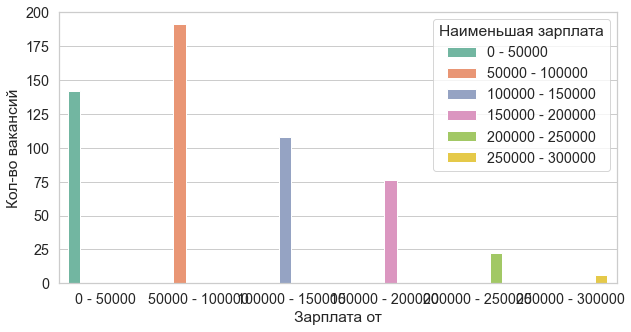

In [282]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_from, x='name', y='count', hue='name', ci=None).set(ylabel='Кол-во вакансий', xlabel='Зарплата от')
    plt.legend(title='Наименьшая зарплата')

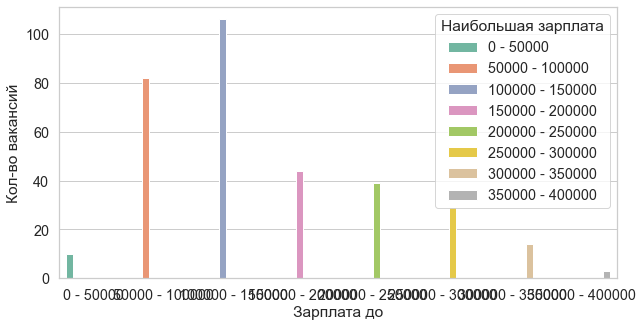

In [283]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_to, x='name', y='count', hue='name', ci=None).set(ylabel='Кол-во вакансий', xlabel='Зарплата до')
    plt.legend(title='Наибольшая зарплата')

### Вывод:
Судя по полученным данным, аналитикам необходимо владеть SQL, аналитическим мышлением, Python. На это указывает то, что эти навыки встречаются чаще всего в вакансиях.

Зарплаты дата саентистов в среднем начинаются от 50000-100000 рублей и заканчиваются 100000-150000
Скорее всего это зарплата Junior+ и Middle аналитиков, ибо высокие зарплаты встречаются сильно реже, они скорее для сеньоров. Конечно в учет не шли вакансии, в которых не была указана ЗП.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Проведем Анализ для Game Designer в Москве

In [290]:
# СОБИРАЕМ ДАННЫЕ
data = []
def getGameVacancies(page):
    params = {
        'text': '\"Game Designer\" OR \"Гейм дизайнер\" OR \"Игровой дизайнер\" OR \"Дизайнер игр\" OR \"Game Дизайнер\"',
        'area': 1,
        'page': page,
        'per_page': 100
    }
    response = requests.get(url, params)
    return json.loads(response.content.decode())

res = getGameVacancies(0)
data += res['items']
for i in range(1, res['pages']):
    data += getGameVacancies(i)['items']
    time.sleep(1)

# ИЗБАВЛЯЕМСЯ ОТ ДУБЛИКАТОВ
seen = set()
new_data = []
for d in data:
    id = int(d['id'])
    if id not in seen:
        seen.add(id)
        new_data.append(d)

# Создаем датафрейм с подробной инфой о вакансиях
data = new_data
data_table = []
counter = 0

for i in data:
    response = requests.get(url + '/' + str(i['id']))
    data_table.append(json.loads(response.content.decode()))
    counter += 1
    if counter % 30 == 0:
        time.sleep(0.25)

df = pd.json_normalize(data_table)
df.head()

,id,premium,relations,name,insider_interview,response_letter_required,salary,address,allow_messages,department,...,salary.gross,address.metro,vacancy_constructor_template.id,vacancy_constructor_template.name,vacancy_constructor_template.top_picture.height,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.top_picture.path,vacancy_constructor_template.top_picture.blurred_path,vacancy_constructor_template.bottom_picture,employer.logo_urls
0,77085729,False,[],Game Designer,None,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77486329,False,[],Lead Game Designer,None,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55593632,False,[],Game Designer на мобильную RTS,None,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77653776,False,[],Middle/Senior Game Designer (VR),None,False,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77306624,False,[],Lead Game Designer / Producer,None,True,NaN,NaN,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Найдем 15 самых востребованных навыков для указаной профессии

In [291]:
skills = set()

for i in range(len(df)):
    vacancy = df.iloc[i]
    for skill in vacancy['key_skills']:
        skills.add(skill['name'])
skills = list(skills)

skills_dict = {}
for skill in skills:
    skills_dict[skill] = 0
    for i in range(len(df)):
        if {'name': skill} in df.iloc[i]['key_skills']:
            skills_dict[skill] += 1

sorted_keys = sorted(skills_dict, key=skills_dict.get)
sorted_keys.reverse()

print("Num of skills:", len(skills))
print("Top 15 is:\n", *sorted_keys[:15])

Num of skills: 167
Top 15 is:
 Unity Game Design Gamedev Разработка компьютерных Игр Креативность Adobe Photoshop Английский язык Unreal Engine 4 C# Грамотная речь Git Аналитическое мышление Работа в команде Unity 3D Game Programming


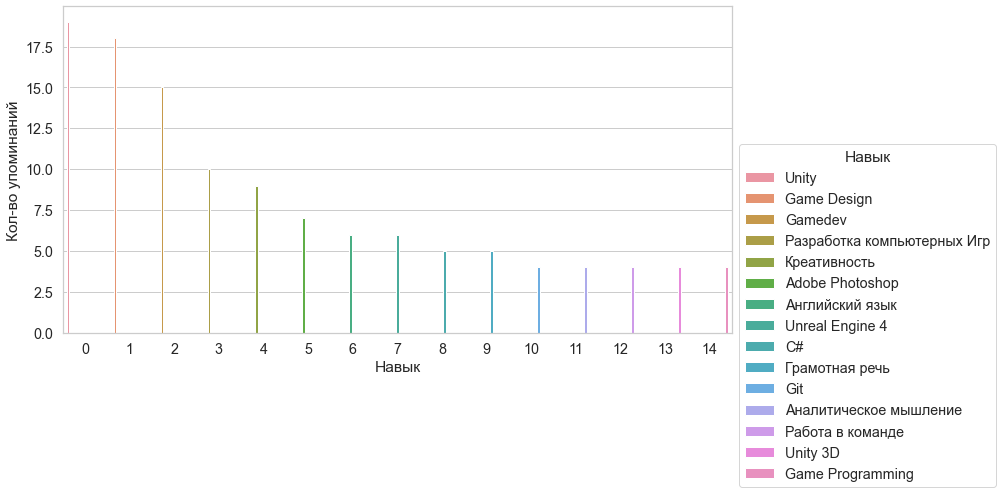

In [292]:
top_skills = list()
ind = 0
for key in sorted_keys[:15]:
    top_skills.append(
        {
            'id': ind,
            'name': key,
            'count': skills_dict[key]
        }
    )
    ind += 1
df_skills = pd.json_normalize(top_skills)
#print(df_skills.head())


with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_skills, x='id', y='count', hue='name', ci=None).set(ylabel='Кол-во упоминаний', xlabel='Навык')
    plt.legend(title='Навык', bbox_to_anchor=(1, 0.6))

Курс валют взят на 03.03.2023

In [293]:
usd_rub = 75.52
eur_rub = 80.09
max_salary = 0
min_salary = 0
tax = 0.13
df_tmp = df.dropna(axis='index', how='any', subset=['salary.gross'])
df_max_salary = df_tmp.groupby(by=['salary.currency']).max(['salary.from', 'salary.to'])
df_min_salary = df_tmp.groupby(by=['salary.currency']).min(['salary.from', 'salary.to'])

Определяем минимальную и максимальную зарплаты, чтобы заполнить ими пустоты

In [294]:
# Находим самую максимальную зарплату
for i in range(len(df_max_salary)):
    has_tax = !df_max_salary.iloc[i]['salary.gross']
    curr = df_max_salary.index[df_max_salary['salary.to'] == df_max_salary.iloc[i]['salary.to']].values[0]
    if curr == 'USD':
        if has_tax is False:
            salary = (usd_rub * df_max_salary.iloc[i]['salary.to']) - (usd_rub * df_max_salary.iloc[i]['salary.to'] * tax)
        else:
            salary = usd_rub * df_max_salary.iloc[i]['salary.to']
    if curr == 'EUR':
        if has_tax is False:
            salary = (eur_rub * df_max_salary.iloc[i]['salary.to']) - (eur_rub * df_max_salary.iloc[i]['salary.to'] * tax)
        else:
            salary = eur_rub * df_max_salary.iloc[i]['salary.to']
    else:
        if has_tax is False:
            salary = df_max_salary.iloc[i]['salary.to'] - df_max_salary.iloc[i]['salary.to'] * tax
        else:
            salary = df_max_salary.iloc[i]['salary.to']
    if salary > max_salary:
        max_salary = salary

min_salary = max_salary

# Находим самую минимальную зарплату
for i in range(len(df_min_salary)):
    has_tax = !df_min_salary.iloc[i]['salary.gross']
    curr = df_min_salary.index[df_min_salary['salary.from'] == df_min_salary.iloc[i]['salary.from']].values[0]
    if curr == 'USD':
        if has_tax is False:
            salary = (usd_rub * df_min_salary.iloc[i]['salary.from']) - (usd_rub * df_min_salary.iloc[i]['salary.from'] * tax)
        else:
            salary = usd_rub * df_min_salary.iloc[i]['salary.from']
    if curr == 'EUR':
        if has_tax is False:
            salary = (eur_rub * df_min_salary.iloc[i]['salary.from']) - (eur_rub * df_min_salary.iloc[i]['salary.from'] * tax)
        else:
            salary = eur_rub * df_min_salary.iloc[i]['salary.from']
    else:
        if has_tax is False:
            salary = df_min_salary.iloc[i]['salary.from'] - df_min_salary.iloc[i]['salary.from'] * tax
        else:
            salary = df_min_salary.iloc[i]['salary.from']
    if salary < min_salary:
        min_salary = salary

print(min_salary, max_salary)

500.0 320360.0


Приведем зарплаты к одной валюте и будем учитывать их с вычетом налогов

In [295]:
for i, row in df_tmp.iterrows():
    if row['salary.currency'] == 'USD':
        if pd.isnull(row['salary.from']):
            df_tmp.loc[i, ('salary.from',)] = min_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.from',)] = (row['salary.from'] * usd_rub) - (row['salary.from'] * usd_rub * tax)
            else:
                df_tmp.loc[i, ('salary.from',)] = row['salary.from'] * usd_rub
        if pd.isnull(row['salary.to']):
            df_tmp.loc[i, ('salary.to',)] = max_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.to',)] = (row['salary.to'] * usd_rub) - (row['salary.to'] * usd_rub * tax)
            else:
                df_tmp.loc[i, ('salary.to',)] = row['salary.to'] * usd_rub

    elif row['salary.currency'] == 'EUR':
        if pd.isnull(row['salary.from']):
            df_tmp.loc[i, ('salary.from',)] = min_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.from',)] = (row['salary.from'] * eur_rub) - (row['salary.from'] * eur_rub * tax)
            else:
                df_tmp.loc[i, ('salary.from',)] = row['salary.from'] * eur_rub
        if pd.isnull(row['salary.to']):
            df_tmp.loc[i, ('salary.to',)] = max_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.to',)] = (row['salary.to'] * eur_rub) - (row['salary.to'] * eur_rub * tax)
            else:
                df_tmp.loc[i, ('salary.to',)] = row['salary.to'] * eur_rub

    else:
        if pd.isnull(row['salary.from']):
            df_tmp.loc[i, ('salary.from',)] = min_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.from',)] = row['salary.from'] - row['salary.from'] * tax
        if pd.isnull(row['salary.to']):
            df_tmp.loc[i, ('salary.to',)] = max_salary
        else:
            if row['salary.gross']:
                df_tmp.loc[i, ('salary.to',)] = row['salary.to'] - row['salary.to'] * tax

df_tmp.head()

C:\Users\Daler Hojimatov\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,premium,relations,name,insider_interview,response_letter_required,salary,address,allow_messages,department,...,salary.gross,address.metro,vacancy_constructor_template.id,vacancy_constructor_template.name,vacancy_constructor_template.top_picture.height,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.top_picture.path,vacancy_constructor_template.top_picture.blurred_path,vacancy_constructor_template.bottom_picture,employer.logo_urls
10,75725251,False,[],Game Designer (Middle\Senior),None,False,NaN,NaN,True,None,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,77025198,False,[],Креатор / Гейм-дизайнер (AR),None,False,NaN,NaN,True,None,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,77354452,False,[],Game designer — Hyper casual games (Limassol),None,False,NaN,NaN,True,None,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,77423757,False,[],Гейм-дизайнер (удаленно),None,False,NaN,NaN,True,None,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,77364406,False,[],Unity Game Designer на гиперказуальные проекты...,None,False,NaN,NaN,True,None,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Создадим таблицу для минимальных зарплат, по ней построим график

In [296]:
m = df_tmp['salary.from'].max()
df_from = []
froms = pd.DataFrame(df_tmp.groupby(by=['salary.from']).count()['name'])

for i in range(int(m / 50000)):
    df_from.append({'name': f'{i * 50000} - {i * 50000 + 50000}', 'count': 0})

for i, row in froms.iterrows():
    for j in range(int(m / 50000)):
        if i <= j * 50000.0 + 50000.0:
            df_from[j]['count'] += row['name']
            break

df_from = pd.json_normalize(df_from)
df_from

,name,count
0,0 - 50000,4
1,50000 - 100000,5
2,100000 - 150000,2
3,150000 - 200000,2


Создадим табличку для максимальных зарплат, по ней построим график

In [297]:
m = df_tmp['salary.to'].max()
df_to = []
tos = pd.DataFrame(df_tmp.groupby(by=['salary.to']).count()['name'])

for i in range(int(m / 50000)):
    df_to.append({'name': f'{i * 50000} - {i * 50000 + 50000}', 'count': 0})

for i, row in tos.iterrows():
    for j in range(int(m / 50000)):
        if i <= j * 50000.0 + 50000.0:
            df_to[j]['count'] += row['name']
            break

df_to = pd.json_normalize(df_to)
df_to

,name,count
0,0 - 50000,1
1,50000 - 100000,1
2,100000 - 150000,2
3,150000 - 200000,1
4,200000 - 250000,3
5,250000 - 300000,1


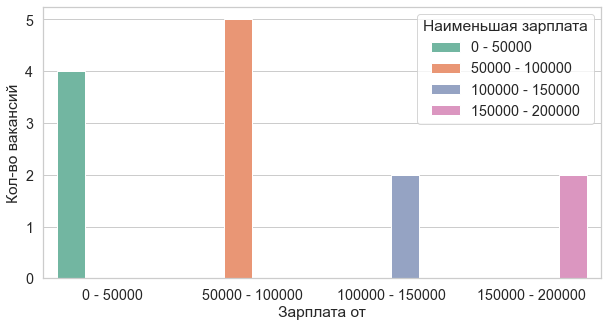

In [298]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_from, x='name', y='count', hue='name', ci=None).set(ylabel='Кол-во вакансий', xlabel='Зарплата от')
    plt.legend(title='Наименьшая зарплата')

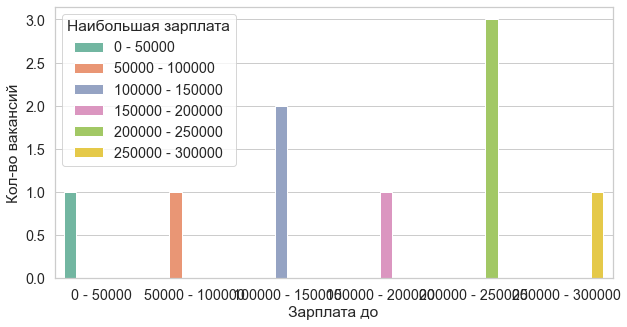

In [299]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_to, x='name', y='count', hue='name', ci=None).set(ylabel='Кол-во вакансий', xlabel='Зарплата до')
    plt.legend(title='Наибольшая зарплата')

Не забывайте про выводы.

## Вывод:
Судя по полученным данным, кандидату на должность гейм дизайнера необходимо быть знакомым с одним из игровых движков (Без этого никуда, а где иначе работать), быть креативным (куда же без этого в творческом деле), знать английский (Ну игрушки нынче должны быть на английском), знать C# (думаю не только его, но он в гейм деве считается базовым).

На сайте hh.ru в вакансиях на гейм дизайнера редко (очень редко) указывается размер заработной платы, но исходя из того, что имеем, можно сказать, что гейм дизайнер в среднем зарабатывает больше аналитика. Нижне пороговые зарплаты у них приблизительно равны, а вот верхне пороговые сильно различаются, 100-150тыс. у аналитиков и 200-250тыс. у гейм дизайнеров.

В отличие от аналитиков у игровых дизайнеров встречаются зарплаты в евро, скорее всего их работа более интернациональна и заказчик чаще иностранная компания, многие российские компании не создают игры сами, а делают это на аутсорс для иностранных компаний.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [ ]:
...

Какие выводы можно сделать из построенных графиков?

<...>